# Ejercicios Clase: Álgebra en Ciencia de Datos
### Estudiante: Edgard Iglesias Rubio

## Unidad 1
### Cadenas de Markov

1 Modelo SIR: Un epidemiólogo elaboró el siguiente grafo para describir la transición, de una semana a otra, entre los estados "Susceptible", "Infectado" y " Recuperado" en una población donde se desarrolla una epidemia. Si inicialmente toda la población es suceptible, ¿Qué proporción de la población va a estar en cada estado luego de n semanas?

![modeloSIR](img/modeloSIR.png)

In [1]:
#imports 
import numpy as np
import matplotlib.pyplot as plt
import random

Este ejercicio lo discutimos y lo resolvimos en clase con un grupo de compañeros entre ellos: Laura González, Diego Rangel, Manuela Ramos, Harold Díaz...

Planteamos al ejercicio como un vector 1x3 donde esta el estado actual de la población y una matriz 3x3 que representa al modelo SIR, en las filas tenemos el nodo origen (estado actual) y en las columnas el nodo destino (o estado siguiente). Al multiplicar el vector por la matriz obtenes como resultado un vector de 1x3 con la nueva distribución de la población.

In [2]:
m_modelo=[[0.8,0.2,0.0],
          [0.0,0.5,0.5],
          [0.9,0.0,0.1]]

Iteraremos sobre el modelo unas cuantas veces para luego identificar si converge hacia un valor que podamos expresar en función de n

In [3]:
S = [] 
I = []
R = []

v_pob=[1.0,0.0,0.0]

for i in range(0,40):
    S.append(v_pob[0])
    I.append(v_pob[1])
    R.append(v_pob[2])
    v_pob = np.dot(v_pob,m_modelo)

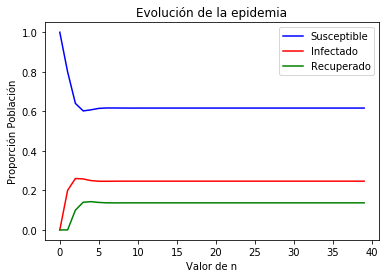

In [4]:
# Graficar los resultados
plt.plot(range(len(S)), S, label='Susceptible', color='blue')
plt.plot(range(len(I)), I, label='Infectado', color='red')
plt.plot(range(len(R)), R, label='Recuperado', color='green')
plt.xlabel('Valor de n')
plt.ylabel('Proporción Población')
plt.title('Evolución de la epidemia')
plt.legend()
plt.show()

In [5]:
v_pob

array([0.61643836, 0.24657534, 0.1369863 ])

Efectivamente un poco antes de la 5ta iteración el modelo se estabiliza, luego de n semanas la proporción de la población quedará de la siguiente forma:
- Susceptible: 0.6164
- Infectado: 0.2466
- Recuperado: 0.1370

2. Escaleras y toboganes: El juego consiste en lanzar un dado y avanzar el número de casillas que indique el dado, subiendo por la escalera o bajando por el tobogán si terminas en la celda correspondiente. ¿Cuál es el número esperado de lanzamientos necesarios para llegar a la casilla final?

![esctob](img/esctob.png)

Este ejercicio lo discutimos y lo planteamos en la primera clase, luego discutimos la solución en conjunto con Harold Diaz y mi persona

Planteamos el ejercicio como una matriz cuyas filas representan la casilla inicial y las columnas del 1 al 6 son la casilla a la que llegaremos de acuerdo al número obtenido por el dado.
En la matriz las filas que corresponen a la casilla 2, 6 y 7 no tienen valores debido a que no es posible finalizar turno en ellas

In [6]:
mat = [[4,3,4,5,8,3],
        [],
        [4,5,8,3,8,9],
        [5,8,3,8,9,9],
        [8,3,8,9,9,9],
        [],
        [],
        [9,9,9,9,9,9],
        []
    ]

In [7]:
# si estando en la casilla 1 obtengo 3 en el dado, caigo en la casilla 4:
mat[0][2]

4

In [8]:
# si estando en la casilla 4 obtengo 3 en el dado, caigo en la casilla 3:
mat[3][2]

3

Planteamos el ejercicio como si fuera un modelo de montecarlo, luego de 1000 simulaciones evaluar el valor esperado de intentos por simulación para llegar a la casilla final:

In [9]:
turnos=1
casilla_ant=1

intentos=[]
for i in range(0,1000):
    turnos=1
    casilla_ant=1
    while True:
        dado =random.randint(1, 6)
        #print('Dado:{dado} turno {turnos}: llegue a casilla: {matrix}'.format(dado=dado,turnos=turnos, matrix=matrix[casilla_ant-1][dado-1]))
        casilla = mat[casilla_ant-1][dado-1]
        if casilla==9:
            intentos.append(turnos)
            break
        casilla_ant=casilla
        turnos+=1

In [10]:
sum(intentos)/len(intentos)

2.87

Luego de 1000 simulaciones podemos concluir que el número de intentos en promedio para llegar a la casilla final es de 3